# Term Project: 별의 물리량 Dataset을 이용한 항성 분류


# 서론
헤르츠스프룽과 러셀은 항성을 분류하고 각 Claster의 특성을 파악하려 했다. 이를 위하여 둘은 별의 광도를 y축, 표면 온도를 x축으로 했을 때 둘 사이의 관계를 나타낸 그래프인 "H-R도"를 고안해냈다. 그래프 내 위치상으로 별들은 서로 각자의 군집을 짓고 있는 것으로 보이며, 이를 토대로 현재까지도 별은 특성이 비슷한 Claster에 따라 백색 왜성/주계열성/거성/초거성 등의 이름으로 분류하고 있다.
'이 데이터를 모아 사람이 아니라 컴퓨터 알고리즘에게 분류하도록 해낸다면 어떨까?'라는 동기에서 프로젝트를 착수하게 되었다.
이번 Term Project를 통해 항성 데이터를 수집하고 가공하여 각 군집의 특징을 파악한 다음 KNN 분류 모델에 각 항성간의 특징을 학습시킬 계획에 있다. 또한 가능하다면 H-R도에 따라 이미 분류된 항성들을 정답 데이터로 학습시켜 새로운 별의 물리량을 입력했을 때 그 항성이 H-R도상 어느 군집으로 분류하는 것이 가장 적합할지 예측하는 모델을 완성하는 것에 목표를 두고 있다. 

# 가설
\#1. H-R도에 따라, 인터넷에서 확보한 항성 데이터들을 Graph로 나타냈을 시 Star Type에 따라 구분되는 각 Claster은 가시적으로 두드러지게 구분될 것이다.

\#2. 표면 온도(K), 광도(L/Lo), 절대 등급(Mv) 의 세 가지 데이터에 대해서 Star Type이 같은 각각 Claster끼리 수학적으로도 밀접한 유사성을 보일 것이며 이를 통한 구분짓기가 가능할 것이다.

\#3. 위의 두 가설이 맞다는 전제 하에 Star Dataset으로 KNN 분류 모델을 학습시켰을 때 이미 Star type을 알고 있는 별의 물리량을 입력하였을 시 모델은 높은 정확도로 Star type을 맞힐 것이다.
(또한 이 가설은 가설\#2와 필요 충분의 관계로 서로를 입증할 것이다.)

\#4. 모든 가설이 맞다고 판단된다면 KNN 모델을 통해 새로운 별이 발견되었을 때 사람이 직접 판단하지 않더라도 알고리즘이 Star Type을 적절하게 제시하는 프로그램을 완성했다고 할 수 있다. 

# \#1.Dataset 확보하기
프로젝트에서 요구하는 대표적인 데이터셋은 충분히 많은 수의 관측된 별과 그 별의 대표적인 물리량들이다. 고맙게도, 예측모델 및 분석 대회 플랫폼인 "Kaggle"에서 진행하고자 하는 프로젝트에 알맞게 Hertzsprug-Russel Diagram csv file을 제공하는 것을 찾을 수 있었다. 
데이터 내에는 총 240개의 별이 등재되어 있으며, 표면 온도/광도/반지름/절대등급/분류된 별의 종류/겉보기 색/분광형 의 물리량을 가지고 있었다. 

[데이터 출처](https://www.kaggle.com/datasets/deepu1109/star-dataset)

!!단, 필자는 Dataset만 가져왔을 뿐 Kaggle 플랫폼 내 어떠한 타인의 코드도 일절 사용하지 않았다!!

In [ ]:
import pandas as pd    #csv file을 읽기 위해 3rdparty 모듈 중 pandas를 채택했다.

rawdata = pd.read_csv('stars_raw.csv')  #획득한 데이터 원본이다.
rawdata.head()  #제대로 불러왔는지 확인차 작성했다. 실행 시 하단에 읽힌 csv 파일이 출력된다.

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


# \#2. 데이터 가공하기
가져온 데이터를 가시적이면서 활용하기 용이하도록 slicing하는 과정을 거쳤다.
분류 학습을 위해 각 군집별 특징을 알 수 있을 만한 데이터를 최대한 남겨놓는 것이 좋지만, 프로젝트의 중심은 H-R도에 따른 분류 모델이므로 필요없는 물리량은 과감히 삭제했다.

In [2]:
column_list = ["Temp","Lumin","Rad","Mag","Type","Col","Spect"] #열의 이름을 변경한 리스트 작성
rawdata.columns = column_list   #날것 데이터의 열 이름을 삽입했다.

"""
Star type는 Kaggle 사이트에서 새롭게 정의한 분류용 정수값이다.
이는 데이터 분류 논리에서 효율적이겠으나 가시적으로 문제가 있으므로 
추가적으로 Name 인덱스를 설정해 주었다.
물론 Data 학습 시에는 새롭게 index를 설정해 주기에 놔두는 것이 효율적일지도 모르겠다... 
허나 원래 index 부여는 index가 없는 Data에서 필수적으로 해야 하는 일이므로 우선 삭제했다.
"""
starlist = ["BrownDwarf","RedDwarf","WhiteDwarf","MainSequence","SuperGiant","HyperGiant"]
starlist_KOR = ["갈색왜성","적색왜성","백색왜성","주계열성","초거성","극대거성"] #출력값의 가시성을 위해 추가적으로 작성했다.

for i in range(len(starlist)):
    rawdata.loc[rawdata['Type']== i, 'Name'] = starlist[i]    



In [3]:
#필요없는 열을 제거한 데이터셋 새로 선언
processed_data = rawdata.drop(columns=['Rad','Type','Col','Spect'])
unit_list = ["K","L/Lo","Mv","Name"] #혹여 물리량을 표시할 필요가 있을 때를 대비해 리스트를 추가 작성함
column_list_KOR = ["표면온도","광도","절대등급","이름"]


processed_data

,Temp,Lumin,Mag,Name
0,3068,0.002400,16.12,BrownDwarf
1,3042,0.000500,16.60,BrownDwarf
2,2600,0.000300,18.70,BrownDwarf
3,2800,0.000200,16.65,BrownDwarf
4,1939,0.000138,20.06,BrownDwarf
...,...,...,...,...
235,38940,374830.000000,-9.93,HyperGiant
236,30839,834042.000000,-10.63,HyperGiant
237,8829,537493.000000,-10.73,HyperGiant
238,9235,404940.000000,-11.23,HyperGiant


In [ ]:
processed_data.to_csv("stars_new.csv",index=False) #미리 만들어둔 stars_new.csv 파일에 가공 데이터를 저장
#즉 가공한 데이터 원본이다.

# \#3. H-R도 가시화
실제 데이터셋이 모였으므로 데이터를 바탕으로 H-R도가 알고 있는 모습대로 구현되는지 확인하는 작업을 수행하였다.

In [5]:
#Matplotlib이라는 3rdParty 모듈을 활용하였다.

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') #한글폰트 불러오기: GPT에게 얻은 모듈이다.
plt.rcParams['axes.unicode_minus'] = False #마이너스 폰트 불러오기:GPT에게 얻은 모듈이이다.

data = pd.read_csv('stars_new.csv') #저장한 파일을 새롭게 불러왔다.
data.head()

,Temp,Lumin,Mag,Name
0,3068,0.002400,16.12,BrownDwarf
1,3042,0.000500,16.60,BrownDwarf
2,2600,0.000300,18.70,BrownDwarf
3,2800,0.000200,16.65,BrownDwarf
4,1939,0.000138,20.06,BrownDwarf


<Axes: xlabel='Temp', ylabel='Mag'>

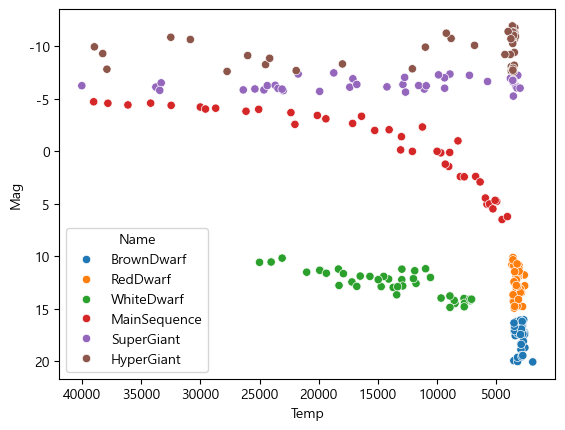

In [6]:
import seaborn as sns #seaborn 모듈을 통해 시각 보조 그래프의 가시성을 강화했다.

x = data['Temp']
y = data['Mag']
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
sns.scatterplot(data=data,x='Temp',y='Mag',hue="Name") #이름 값으로 Data를 구분했다.


![H-R_image.jpeg](H-R_image.jpeg)

해당 사진이 실제 H-R도에 별을 올려 둔 사진이며, seaborn과 matplotlib으로 제시한 그래프와 유사함을 확인하였다.
이로써 정상적인 데이터 가공이 이루어졌음을 짐작할 수 있다.

다시 말해서, 

가설 \#1. H-R도에 따라, 인터넷에서 확보한 항성 데이터들을 Graph로 나타냈을 시 Star Type에 따라 구분되는 각 Claster은 가시적으로 두드러지게 구분될 것이다.

를 증명할 수 있었다.

# \#4.Scikit-Learn KNN 알고리즘 학습

가공한 데이터를 바탕으로 새로운 별의 물리량 Data가 입력값으로 주어졌을 시 그 별이 어느 claster에 가장 적합하게 분류되는지 예측하는 모델을 구축하려 한다.

사용에 앞서 KNN 알고리즘에 대한 사전적인 이해를 바탕으로 코딩을 진행하였다. KNN 알고리즘은 이미 claster가 존재하는 데이터에서 새로운 점 Data가 주어졌을 때 그 주위 K개의 점이 어느 라벨에 속하는지를 사용하여 학습을 진행한다. 

우선 수집한 Data를 모델이 학습할 수 있도록 최종 정리했다다.

In [7]:
X = data[['Temp','Lumin','Mag']]
X_train = X  #원래 표준화 전처리를 진행했으나 오류가 빈번히 생겨 기본 데이터로 진행하게 되었다...
X_train.head()

,Temp,Lumin,Mag
0,3068,0.002400,16.12
1,3042,0.000500,16.60
2,2600,0.000300,18.70
3,2800,0.000200,16.65
4,1939,0.000138,20.06


모델은 위의 3가지 데이터를 바탕으로 별의 "Name"을 예측해내야 한다.

예측해야 하는 정답을 y_train에 삽입하여 지도학습용 데이터를 만든다.

In [8]:
for i in range(len(starlist)):
    data.loc[data["Name"] == starlist[i], 'label'] = i #str대신 int index를 새로 부여해 학습에 사용함.

y_train = data['label'].astype(int)
y_train

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: label, Length: 240, dtype: int64

학습 모델은 파이썬의 3rdparty 모듈인 scikit-learn에서 제공하는

KNeighborsClassifier 을 사용했다. 

In [9]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)  #이곳이 K를 정하는, 즉 가중치 설정 구간이다. 가장 정확도가 높은 K로 설정한 상태이다.
model.fit(X_train, y_train)  #가공한 데이터로 학습을 진행했다.

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [20]:
DataForPrediction = []  #사용자가 직접 입력한 신규 Data를 저장하는 list이다.
for i in range(3):
    DataForPrediction.append(float(input("{}은/는 몇 {}인가요?".format(column_list_KOR[i],unit_list[i]))))

print("입력한 값:",DataForPrediction)

data_input = pd.DataFrame([DataForPrediction], columns=['Temp', 'Lumin', 'Mag'])
#예측 메서드는 pd의 DataFrame 형태이므로 그에 맞게 가공해주었다.


predicted_label = model.predict(data_input) #예측후 그 label 값을 새 변수에 저장한다.
predicted_star_type = starlist_KOR[predicted_label[0]]  

print(f"예측된 별의 분류: {predicted_star_type}")  #최종적인 결과물이다!

입력한 값: [3750.0, 300000.0, -7.63]
예측된 별의 분류: 극대거성


# \#5. 실제 시행 모습
데모 영상에서 실제 Data들을 담도록 하겠다.

인터넷에서 실제로 수집한 몇 가지 대표적인 Star Data들을 입력해 제대로 예측하는지 확인하는 과정이 있었다. 태양,알파센타우리B,시리우스B,세페우스자리뮤의 경우 실제 Startype을 맞히는 데 성공했다. 단 시리우스 A와 베텔게우스의 경우 예측이 어긋났는데, 오차의 경우 H-R도 내 광도 계급의 +-1 의 오차를 보였다. 다시 말하면, 실제 정답과 완전히 동떨어진 StarType이 아닌 바로 옆자리에 있는 Claster들로 오해하는 경우가 희소하게 있음을 확인할 수 있고 이를 통해 높은 정확도를 보임을 이해할 수 있다.
추가적으로, 별의 Star type들은 현재로서도 계속 판단이 바뀌거나 애매하다고 남기는 경우, 혹은 주변 항성들과의 간섭으로 물리량을 제대로 파악하지 못하는 경우가 있다. 모델의 오차가 이런 것에 근거할 가능성도 충분히 두어야 한다.

# 결론 및 제언
실제 별 데이터들을 통한 시험에서, 학습한 KNN 모델은 준수한 정확도를 보였다. 이로써

\#2. 표면 온도(K), 광도(L/Lo), 절대 등급(Mv) 의 세 가지 데이터에 대해서 Star Type이 같은 각각 Claster끼리 수학적으로도 밀접한 유사성을 보일 것이며 이를 통한 구분짓기가 가능할 것이다.

\#3. 위의 두 가설이 맞다는 전제 하에 Star Dataset으로 KNN 분류 모델을 학습시켰을 때 이미 Star type을 알고 있는 별의 물리량을 입력하였을 시 모델은 높은 정확도로 Star type을 맞힐 것이다.
(또한 이 가설은 가설\#2와 필요 충분의 관계로 서로를 입증할 것이다.)

이 두 가지의 가설이 참임을 입증할 수 있었다. 결론적으로,

\#4. 모든 가설이 맞다고 판단된다면 KNN 모델을 통해 새로운 별이 발견되었을 때 사람이 직접 판단하지 않더라도 알고리즘이 Star Type을 적절하게 제시하는 프로그램을 완성했다고 할 수 있다. 

최종 가설까지 입증하여 프로젝트를 성공적으로 완료했다.
단 제언하자면, 이미 수집한 DATA에 test로 입력한 항성의 물리량들이 속해있을 가능성이 존재한다. 이 프로젝트에서는 학습에 쓰일 데이터와 test에 쓰일 데이터를 구분하지 않은 점이 아쉬운 점으로 남았다.

인터넷의 Data를 학습시켜 특별한 카테고리나 사용자끼리 claster로 묶어 분류해내는 기술은 널리 사용되고 있다. 해당 알고리즘과 빅데이터 딥러닝을 결합하면 사용자 claster이 원하는 성질의 output을 예측해낼 수 있는 모델 역시 구현해낼 수 있으며, 그 간단하지만 기초적인 시도로서 이 프로젝트에 의의를 두고 싶다.

참고문헌: 강성호, 황정원. (2024-10-31). KNN모델을 이용한 공정신뢰성 향상에 대한 연구. 대한전기학회 학술대회 논문집, 충북.
김미림. "빅데이터 교육역량 강화를 위한 H-R도 탐구 프로그램 개발." 국내석사학위논문 한국교원대학교 대학원, 2021. 충청북도